In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Overview of climate temperature project data
- Annual, average daily maximum temperature projections for Champaign County, based on output from various climate models
<br><br>
- *More info*: https://crt-climate-explorer.nemac.org/climate_graphs/?city=Champaign%2C+IL&county=Champaign%2BCounty&area-id=17019&fips=17019&zoom=7&lat=40.1164204&lon=-88.2433829
<br><br>

## Greenhouse gas concentration scenarios used
- Greenhouse gas concentrations = radiative forcing of climate
<br><br>
- **RCP4.5**:  Based on a future in which humans stop increasing global emissions of heat-trapping gases by 2040 and then dramatically reduce them through 2100
<br><br>
- **RCP8.5**:  Bbased on a future in which global emissions of heat-trapping gases continue increasing through 2100
<br><br>

## Important caveat regarding interpretation
- Projections are typically considered on a decadal (decade) scale, rather than annual scale - so don't interpret annual values themselves too much!

In [2]:
#(1) Read in the data, setting year to be the index column
# In this scenario, it makes sense to have the year as the index, yes? 

data = pd.read_csv('Champaign_County-annual-proj_mod-tmax.csv',index_col='year')
print(data)

       rcp45_weighted_mean   rcp45_min   rcp45_max   rcp85_weighted_mean  \
year                                                                       
2005                  63.7        59.5        66.7                  63.7   
2006                  63.7        60.2        67.3                  63.5   
2007                  64.1        60.8        67.4                  63.4   
2008                  63.3        58.4        67.1                  64.1   
2009                  63.4        61.0        67.3                  63.5   
...                    ...         ...         ...                   ...   
2095                  68.3        62.6        75.4                  73.0   
2096                  68.3        63.0        74.4                  73.4   
2097                  68.1        64.0        73.9                  73.2   
2098                  68.3        63.0        74.0                  73.2   
2099                  68.8        64.2        74.3                  73.4   

       rcp8

In [3]:
# (2) 
# (a) Drop the last column after reading the note
data = data.drop(columns=data.columns[-1],axis=1)

In [4]:
print(data.columns) # leading whitespaces - awkward when referencing column names moving forward
#(b.) Strip leading whitespaces using string manipulation functionality 
data.columns = data.columns.str.lstrip()
print(data.columns)

# This would work too, remvoves ALL whitespaces - fine for this as our column names ONLY have 
# extra whitespaces and not actually legitimate ones, i.e., our column names do not consist of
# multiple words

#data.columns = data.columns.str.replace(' ', '')

Index([' rcp45_weighted_mean', ' rcp45_min', ' rcp45_max',
       ' rcp85_weighted_mean', ' rcp85_min', ' rcp85_max'],
      dtype='object')
Index(['rcp45_weighted_mean', 'rcp45_min', 'rcp45_max', 'rcp85_weighted_mean',
       'rcp85_min', 'rcp85_max'],
      dtype='object')


In [5]:
#(c.) Check for NaNs!
pd.isnull(data).sum() # no NaNs here!

rcp45_weighted_mean    0
rcp45_min              0
rcp45_max              0
rcp85_weighted_mean    0
rcp85_min              0
rcp85_max              0
dtype: int64

In [6]:
# (3) Indexing practice - access just the rcp45_weight_mean and rcp85_weight_mean columns 
# and save to weighted_means variable 

# What are these weighted means?

# Global climate models are weighted using an approach that considers skill in climatological 
# performance of models over North America and interdependency of models arising from common parameterizations

weighted_means = data[['rcp45_weighted_mean','rcp85_weighted_mean']]
# or weighted_means = data.loc[:,['rcp45_weighted_mean','rcp85_weighted_mean']]

In [7]:
# (4) Subtract the rcp45_weighted_mean column from the rcp85_weighted_mean column, save the result in a new column.

data['diff'] = weighted_means['rcp85_weighted_mean']-weighted_means['rcp45_weighted_mean']

In [8]:
# (5) Using idxmax, determine which year the projections have the greatest difference

year_max = data['diff'].idxmax()
print(year_max)

2096


In [9]:
# (6) And - what is this greatest difference?  Do you think this is physically significant?

# Yes, quite signifiant, as these are ANNUAL average temperature so a difference of 5 degree 
# annual average temperature is quite a lot!

diff_max = data['diff'].max()
print(diff_max)

5.1000000000000085


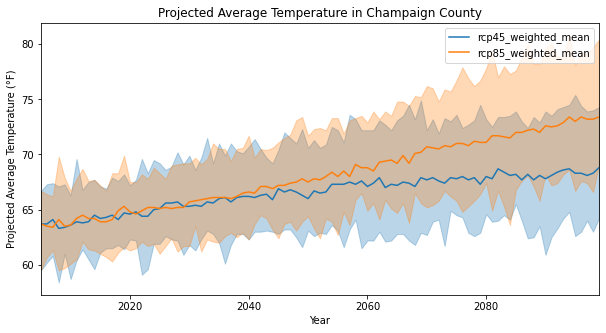

In [10]:
# (7) Finally - let's visualize 
# Create a line plot of the rcp45_weighted_mean and rcp85_weighted_mean data!
# Both on the same line plot!
# Let's use Pandas built-in functionality
# Which remember is just a 'shortcut' to accessing Matplotlib functionality

fig,ax = plt.subplots(figsize=(10,5))

# to remind you that we're passing a subset of the dataframe...aka your weighted_means variable!

data[['rcp45_weighted_mean','rcp85_weighted_mean']].plot(ax=ax) # connecting this plot to the figure/axes we established
                                                                # in previous line allows for customization via ax.___
ax.set_ylabel('Projected Average Temperature (\u00b0F)')  # creates degree symbol! useful!
ax.set_xlabel('Year')
ax.set_title('Projected Average Temperature in Champaign County')
ax.set_xlim(np.min(data.index.values),np.max(data.index.values))

# This is a useful function that fills between values we pass it
# One way we can visualize uncertainty, ranges, etc!
# rcp45_min and max are the minimum and maximum projections when we consider all
# the climate models in the ensemble
# So - that gives us a sense of the RANGE and therefore a sense of the uncertainty
# in the climate model projections
ax.fill_between(data.index, data['rcp45_min'], data['rcp45_max'], color='C0',alpha=0.3)
ax.fill_between(data.index, data['rcp85_min'], data['rcp85_max'], color='C1',alpha=0.3)